<a href="https://colab.research.google.com/github/Srinivas1258/ML-DL/blob/master/Cifar_dataset_cnn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow
!pip install keras-resnet

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Varibles and hyper-paramenters are used in classification

In [5]:
Num_classes=10
IMG_HEIGHT=200
IMG_WIDTH=200
INPUT_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)

import Cifar dataset from keras.datasets 

Dataset in the form of numpy array(means pixel values)

images are converted into pixels

[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]

Labels are encoded into integers 

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]

In [6]:
from keras.datasets import cifar10

(X_train,y_train),(X_test,y_test)=cifar10.load_data()
# print((X_train))
# print(y_train[0:10])
# X_train.shape

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [7]:
from keras.utils import np_utils
X_train=X_train/255.0  # normalizing the input data between 0 and 1
X_test=X_test/255.0

y_train=np_utils.to_categorical(y_train,Num_classes) # converting integres into one-hot encoding(means vecors(0. 0. 0. ... 0. 1. 0.))
y_test=np_utils.to_categorical(y_test,Num_classes)
# print(y_test)
# print(X_test.shape)

Transfer learning with resnet-50 

target image size should be >=200 

we just remove the top layer of resnet and add our custom layers on it.

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer,BatchNormalization,UpSampling2D
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.callbacks import Callback,EarlyStopping,ModelCheckpoint

In [9]:
Resnet=ResNet50(include_top=False,weights='imagenet',input_shape=INPUT_SHAPE)
Resnet.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
__________________________

In [10]:
model=Sequential()
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(Resnet)
model.add(Flatten())
model.add(Dense(256,activation='relu',input_dim=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(Num_classes,activation='softmax'))


In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [12]:
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 3)
cb_checkpointer = ModelCheckpoint(filepath = 'best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')
callback=Callback()
 
history=model.fit(X_train,y_train,batch_size=32,epochs=5,validation_data=(X_test,y_test),callbacks=[cb_early_stopper,cb_checkpointer,callback])

Epoch 1/5
1563/1563 [==============================] - 1379s 882ms/step - loss: 1.2820 - accuracy: 0.5522 - val_loss: 0.8851 - val_accuracy: 0.6999
Epoch 2/5
1563/1563 [==============================] - 1380s 883ms/step - loss: 0.7396 - accuracy: 0.7474 - val_loss: 0.7939 - val_accuracy: 0.7315
Epoch 3/5
1563/1563 [==============================] - 1369s 876ms/step - loss: 0.5445 - accuracy: 0.8148 - val_loss: 0.5987 - val_accuracy: 0.7950
Epoch 4/5
1563/1563 [==============================] - 1366s 874ms/step - loss: 0.4107 - accuracy: 0.8594 - val_loss: 0.7059 - val_accuracy: 0.7738
Epoch 5/5
1563/1563 [==============================] - 1364s 873ms/step - loss: 0.3056 - accuracy: 0.8954 - val_loss: 0.6006 - val_accuracy: 0.8080


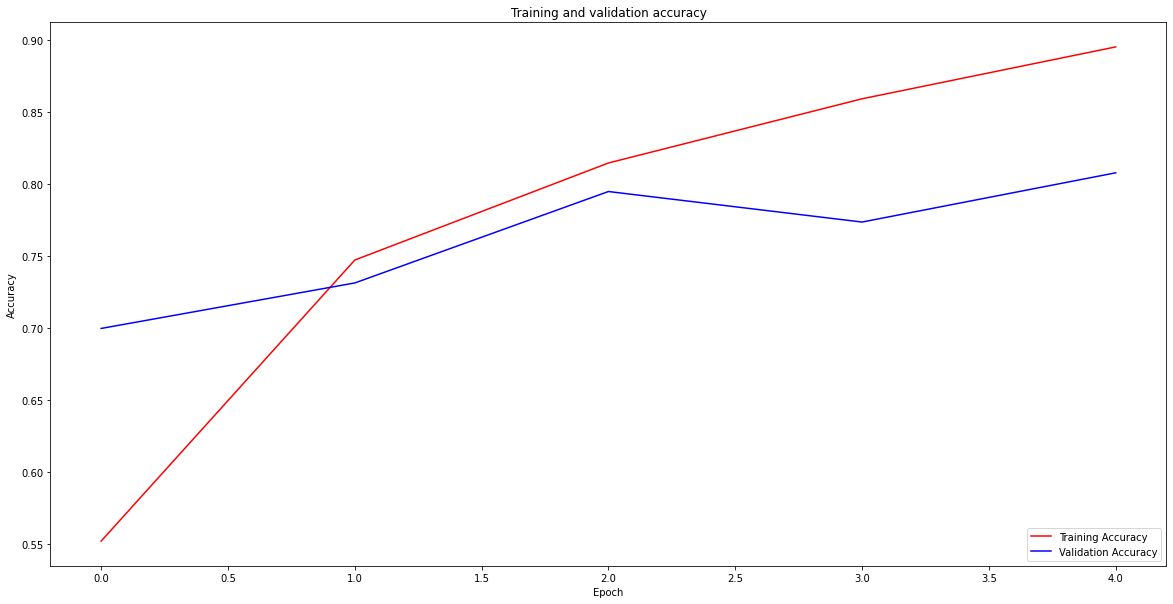

In [15]:
acc=history.history['accuracy']    # modelname.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
 
epochs=range(len(acc))
 
fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Accuracy_curve_CNN_256.jpg')

In [16]:
ls

Accuracy_curve_CNN_256.jpg  best.hdf5  sample_data/


In [ ]:
from google.colab import files
files.download('best.hdf5')